In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
import warning

df_dlist = pd.read_csv('research/listings.csv.gz')
#dropping a row with corrupted data
df_dlist = df_dlist[df_dlist.id != 18476572]

df_list = pd.read_csv('research/listings.csv')

df_cal = pd.read_csv('research/calendar.csv.gz')

df_rv = pd.read_csv('research/reviews.csv.gz')

df_nei = pd.read_csv('research/neighbourhoods.csv')

table = [df_dlist,df_list,df_cal,df_rv,df_nei]


In [3]:
for n in table:
    print('\n' ,n.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2623 entries, 0 to 2623
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 2.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2624 non-null   int64  
 1   name                            2624 non-null   object 
 2   host_id                         2624 non-null   int64  
 3   host_name                       2623 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   2624 non-null   object 
 6   latitude                        2624 non-null   float64
 7   longitude                       2624 non-null   float64
 8   room_type                       2624 non-null   object 
 9   price                    

In [4]:
# dlist_c = list(df_dlist.columns)
# for i, v in enumerate(dlist_c):
#     out = f'{i} : {v}+
#     print (out)

In [5]:
#k,v pairs
# testdata = df_dlist.host_identity_verified
# unique, counts = np.unique(testdata, return_counts=True)
# dict(zip(unique,counts))

# testdata2 = df_dlist.host_is_superhost
# unique2, counts2 = np.unique(testdata2, return_counts=True)
# dict(zip(unique2,counts2))

# testdata3 = df_dlist.square_feet
# unique3, counts3 = np.unique(testdata3, return_counts=True)
# dict(zip(unique3,counts3))


In [6]:
#check if super host has to verify
super_veri = df_dlist[(df_dlist['host_identity_verified'] == 'f') & (df_dlist['host_is_superhost'] == 't')]
# super_veri.loc[:,['host_identity_verified','host_is_superhost']]

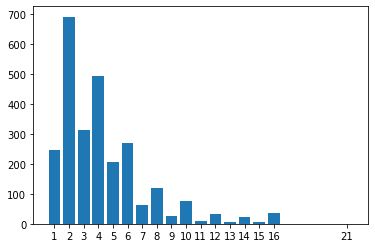

In [328]:
#most common accommodations
df_acc = df_dlist.groupby('accommodates')['accommodates'].count().sort_values(ascending=False)


fig, ax = plt.subplots()
ax.bar(df_acc.index,df_acc)
ax.set_xticks(df_acc.index)
plt.show()
fig.savefig('accommodates_dist.png')

In [252]:
#price distribution
prices_gen = df_list['price']
prices_gen.describe()

count    2624.000000
mean      139.698171
std       134.607059
min        15.000000
25%        60.000000
50%       109.000000
75%       175.000000
max      2000.000000
Name: price, dtype: float64

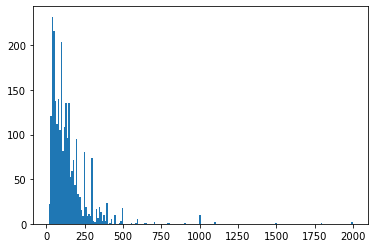

In [330]:
prices_gen.hist(bins=200,grid=False)
plt.savefig('price_dist,png')

In [11]:
most_exp = df_list.max(axis=0)

least_exp = df_list.min(axis=0)

print(most_exp,'\n \n',least_exp)

id                                                                   43593556
name                                         시티와 가까운 럭셔리 콘도에서 1달 사실 여성분 구합니다.
host_id                                                             345006093
neighbourhood_group                                                       NaN
neighbourhood                     Ward F (councilmember Jermaine D. Robinson)
latitude                                                              40.7609
longitude                                                            -74.0299
room_type                                                         Shared room
price                                                                    2000
minimum_nights                                                            365
number_of_reviews                                                         467
reviews_per_month                                                        8.23
calculated_host_listings_count                                  

In [319]:
#location heatmap
map_test = folium.Map(location=[40.72613,-74.048110],
                      tiles = 'Stamen Terrain',
                     zoom_start = 13)



#add measure control
from folium.plugins import MeasureControl
map_test.add_child(MeasureControl())



# #gabe
# from folium.plugins import FloatImage
# url = 'https://s3-us-west-1.amazonaws.com/companies.comparably.com/31512/ceo_v1.jpg'
# FloatImage(url, bottom=5, left=70).add_to(map_test)


# folium.Marker([most_exp[5],most_exp[6]], popup=most_exp[1]).add_to(map_test)
# folium.Marker([least_exp[5],least_exp[6]], popup=least_exp[1]).add_to(map_test)


#heatmap
from folium.plugins import HeatMap
geo_loc = df_list.iloc[:,6:8]
heat_data = [[row['latitude'],row['longitude']] for dex, row in geo_loc.iterrows()]
HeatMap(heat_data, radius=15,blur=15).add_to(map_test)



map_test
map_test.save('listing_heatmap.html')

In [318]:
#make choropleth map
import geopandas

geo_locs = geopandas.read_file('research/neighbourhoods.geojson')
df_geo = df_dlist[['neighbourhood_cleansed','price']]
df_geo['price'] = df_geo['price'].apply(lambda x: numericalize(x))
geo_mean = df_geo.groupby('neighbourhood_cleansed').mean().reset_index()

geo_locs.dropna(inplace=True,axis=1)

map_geo = folium.Map(location=[40.72613,-74.048110],
                     zoom_start = 12.5,
                    tiles='Stamen Terrain')

map_geo.choropleth(
    geo_data = geo_locs,
    data = geo_mean,
    columns = ['neighbourhood_cleansed','price'],
    key_on = 'feature.properties.neighbourhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7,
    line_opacity=0.2
    )



map_geo
map_geo.save('price_heat_ward.html')

/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

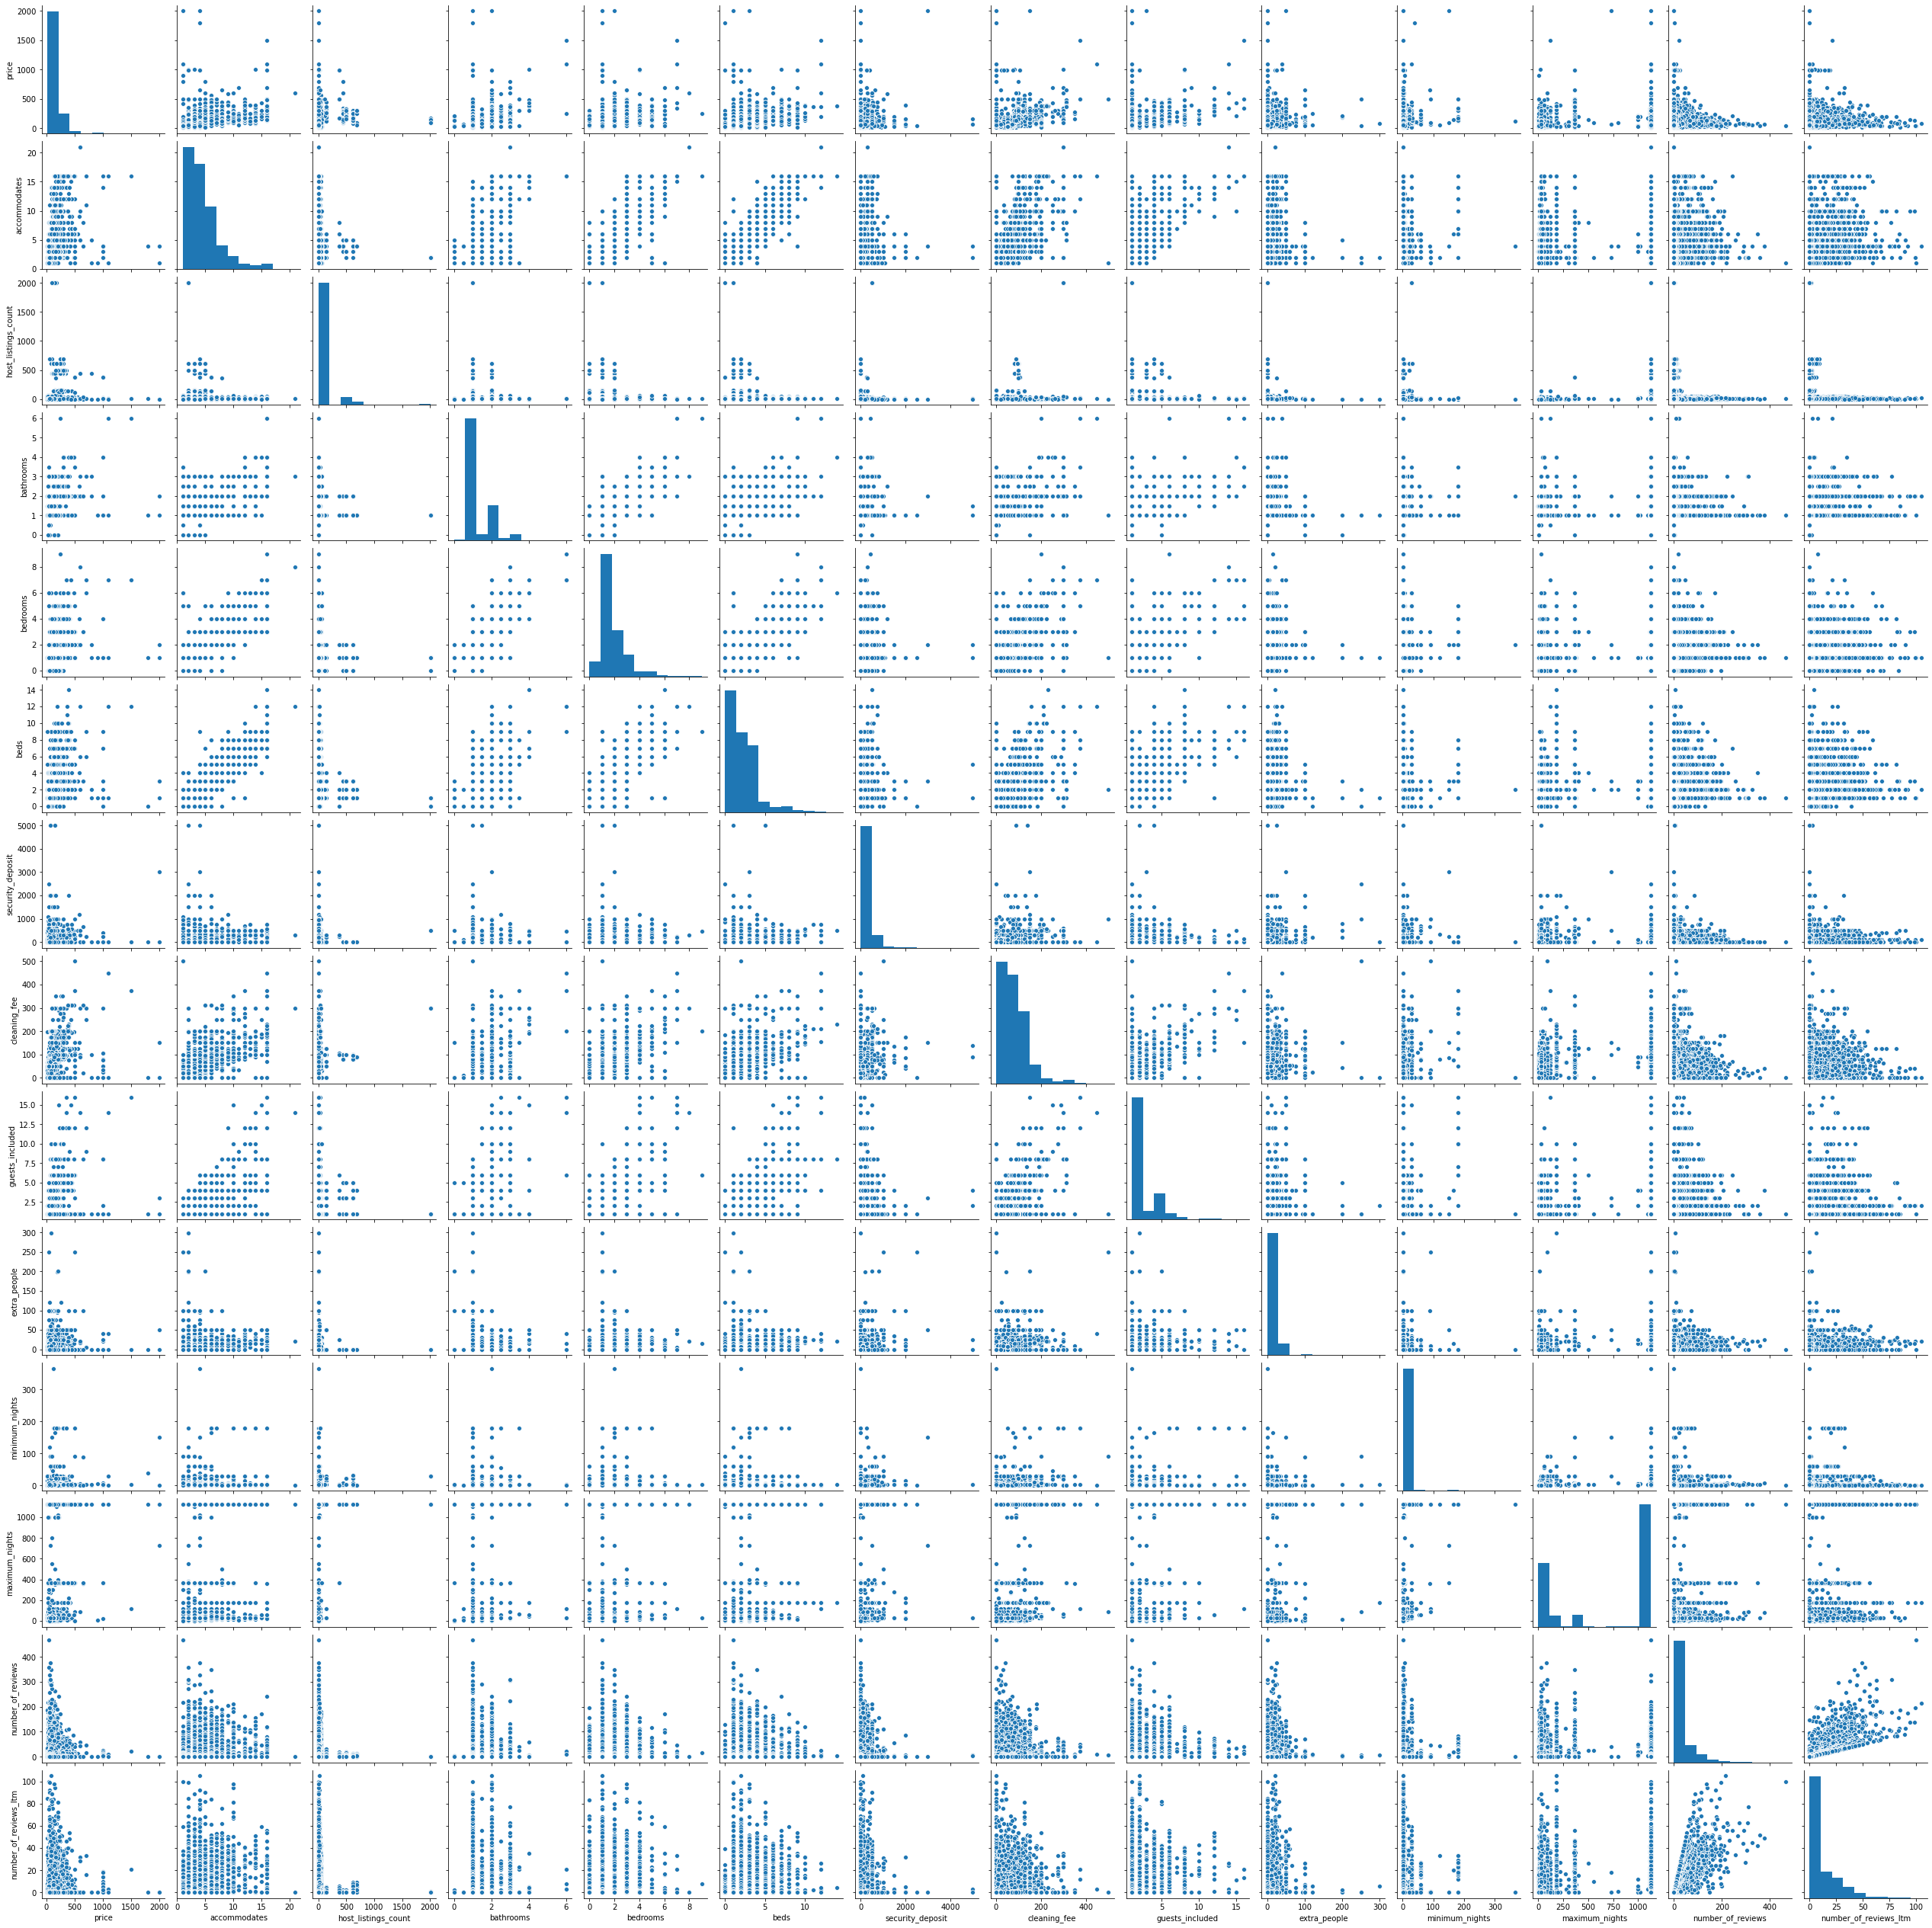

In [427]:
import seaborn as sns
df_num = df_dlist[['price','accommodates','host_listings_count','bathrooms',
                   'bedrooms','beds','security_deposit','cleaning_fee',
                   'guests_included','extra_people','minimum_nights','maximum_nights',
                   'number_of_reviews','number_of_reviews_ltm']]

#clean the dataset
#create the df with numeric value only columns
df_num['price'] = df_num['price'].apply(lambda x: numericalize(x))
df_num['security_deposit'] = df_num['security_deposit'].apply(lambda x: numericalize(x))
df_num['cleaning_fee'] = df_num['cleaning_fee'].apply(lambda x: numericalize(x))
df_num['extra_people'] = df_num['extra_people'].apply(lambda x: numericalize(x))

df_num.fillna(0, inplace=True)


df_corr = df_num.corr()
# df_corr.to_excel('correlation_table.xlsx')

g_num = sns.pairplot(df_num)
g_num

In [471]:
g_num.savefig('scatter_matrix_num.png')

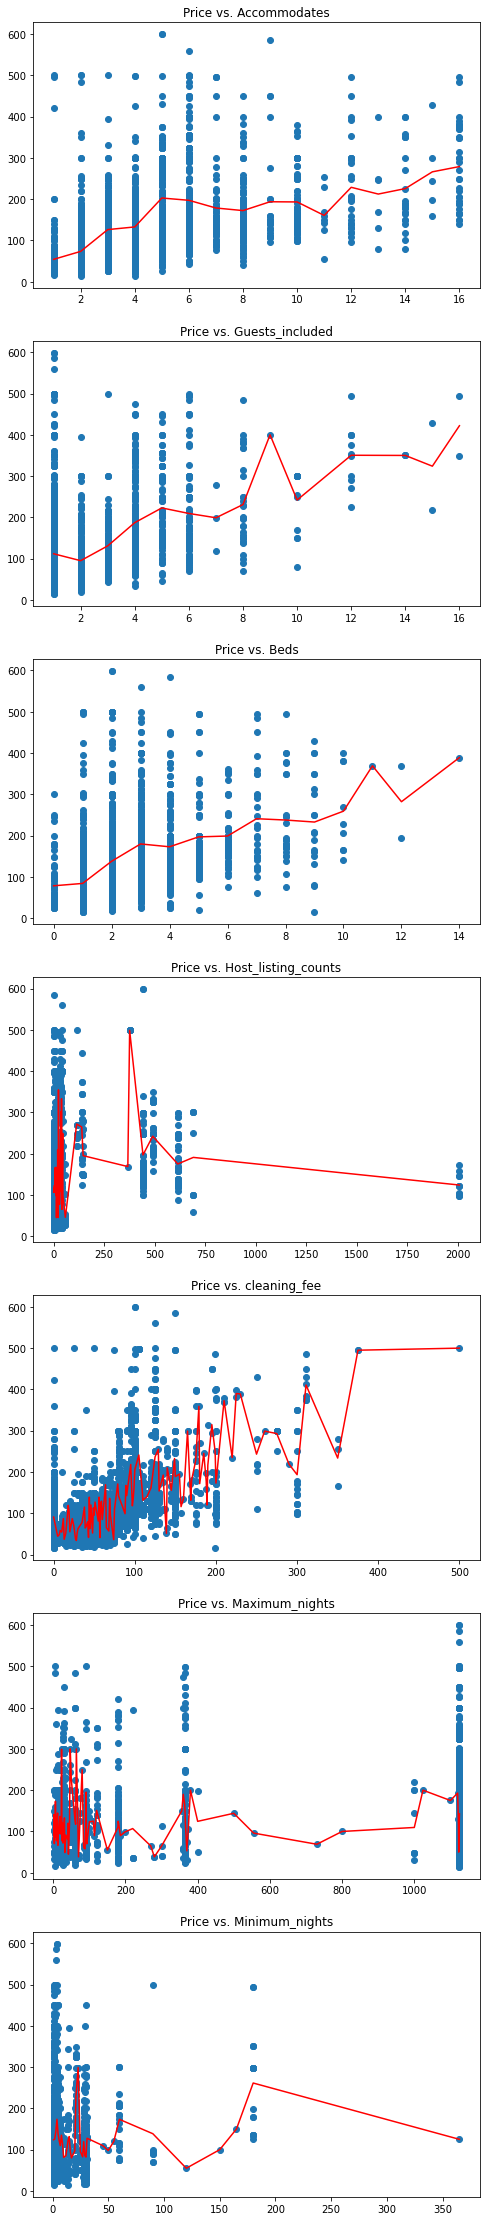

In [327]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,figsize = (8,40))

df_num_no = df_num[df_num['price']<600]
to_plot = ['price','accommodates','guests_included','beds',
           'host_listings_count','cleaning_fee','maximum_nights',
           'minimum_nights']

adj_, avg_ = get_adj_avg(to_plot,df_num_no)
prices, accommodates, guests, beds, host_lsting_count, clean_fee, max_nights, min_nights = adj_
avg_p, avg_a, avg_g, avg_b, avg_h, avg_c, avg_ma, avg_mi = avg_


# plotting
ax1.scatter(accommodates,prices)
ax1.plot(avg_a.index,avg_a,color='red')
ax1.set_title('Price vs. Accommodates')

ax2.scatter(guests,prices)
ax2.plot(avg_g.index,avg_g, color='red')
ax2.set_title('Price vs. Guests_included')

ax3.scatter(beds,prices)
ax3.plot(avg_b.index,avg_b, color='red')
ax3.set_title('Price vs. Beds')
            
ax4.scatter(host_lsting_count, prices)
ax4.plot(avg_h.index,avg_h, color='red')
ax4.set_title('Price vs. Host_listing_counts')
            
ax5.scatter(clean_fee, prices)
ax5.plot(avg_c.index,avg_c, color='red')
ax5.set_title('Price vs. cleaning_fee')
            
ax6.scatter(max_nights,prices)
ax6.plot(avg_ma.index,avg_ma, color='red')
ax6.set_title('Price vs. Maximum_nights')

ax7.scatter(min_nights, prices)
ax7.plot(avg_mi.index,avg_mi, color='red')
ax7.set_title('Price vs. Minimum_nights')

fig.savefig('comparison plots.png')
plt.show()

# print(adj_p.describe(),'\n\n\n',adj_a.describe())# code to normalize
# from scipy import stats
# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]


In [304]:
accommodates

0       2
1       2
2       4
3       3
5       2
       ..
2619    6
2620    2
2621    2
2622    1
2623    2
Name: accommodates, Length: 2597, dtype: int64

In [287]:
df_num_no['accommodates'].unique()

#Null Hypothesis: the amount of people a listing accommodates does not affect the listing price
#                 the mean of price_a(n) equals to the mean of price_a(m)

#Althernative: the amount of people a listing accommodates affects the listing price
#              the mean of price_a(n) does not equal to the mean of price_a(m)
#alpha = 0.05

array([ 2,  4,  3,  1,  6,  5,  8,  9, 12,  7, 10, 16, 11, 13, 14, 15])

count    2597.000000
mean      130.833269
std        94.738304
min        15.000000
25%        60.000000
50%       105.000000
75%       170.000000
max       599.000000
Name: price, dtype: float64

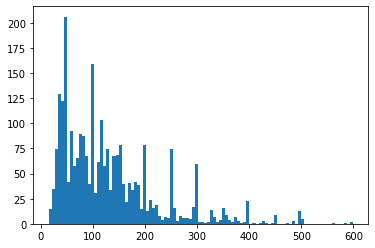

In [357]:
prices.hist(bins=100, grid=False)
plt.savefig('price_dist_norm.png')
prices.describe()

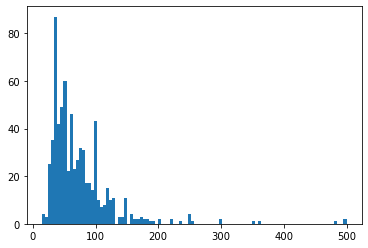

In [359]:
prices_a2 = df_num_no[df_num_no['accommodates'] == 2]['price']
prices_a2.hist(bins=100, grid=False)
stats.ttest_ind(prices,prices_a2)
plt.savefig('prices_a2.png')

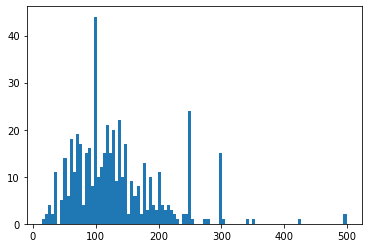

In [360]:
prices_a4 = df_num_no[df_num_no['accommodates'] == 4]['price']
prices_a4.hist(bins=100, grid=False)
stats.ttest_ind(prices,prices_a4)
plt.savefig('prices_a4.png')
#p_value = 0.6785884568587857
#Failed to reject my null hypothesis

Ttest_indResult(statistic=-10.783840871219004, pvalue=1.320270303775871e-26)

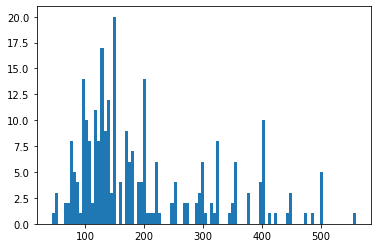

In [363]:
prices_a6 = df_num_no[df_num_no['accommodates'] == 6]['price']
prices_a6.hist(bins=100, grid=False)
plt.savefig('prices_a6.png')
stats.ttest_ind(prices,prices_a6)

Ttest_indResult(statistic=-4.706453313438308, pvalue=2.6470892026059196e-06)

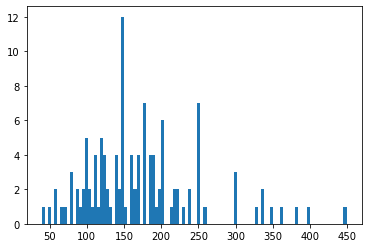

In [362]:
prices_a8 = df_num_no[df_num_no['accommodates'] == 8]['price']
prices_a8.hist(bins=100, grid=False)
plt.savefig('prices_a8.png')
stats.ttest_ind(prices,prices_a8)

Ttest_indResult(statistic=-5.655659360579379, pvalue=1.7173480406858527e-08)

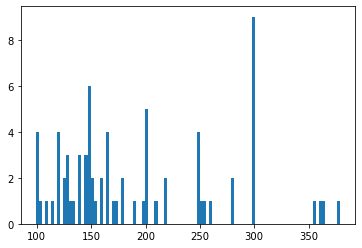

In [364]:
prices_a10 = df_num_no[df_num_no['accommodates'] == 10]['price']
prices_a10.hist(bins=100, grid=False)
plt.savefig('prices_a10.png')
stats.ttest_ind(prices,prices_a10)

Ttest_indResult(statistic=-5.798772870905002, pvalue=7.479179862356972e-09)

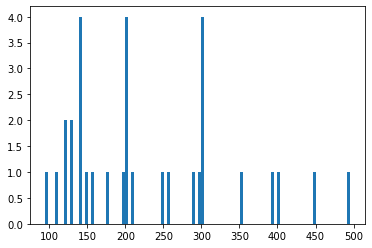

In [365]:
prices_a12 = df_num_no[df_num_no['accommodates'] == 12]['price']
prices_a12.hist(bins=100, grid=False)
plt.savefig('prices_a12.png')
stats.ttest_ind(prices,prices_a12)

In [428]:
import geopy.distance

df_patht = pd.DataFrame([[40.716765, -74.032380],[40.720421, -74.043038],
                         [40.733400, -74.063824],[40.735377, -74.029272]],
                       index = ['Exchange Place','Grove St','Journal Square','Hoboken'],
                       columns = ['latitude','longitude'])

df_to_path = df_dlist[['price','latitude','longitude']]

df_to_path['price']= df_to_path['price'].apply(lambda x: numericalize(x))

df_to_path['to_path']= df_to_path.apply(lambda row: find_shortest([row[1], row[2]]), axis=1)

df_to_path_no = df_to_path[df_to_path['price']<600]

df_to_path_no['to_path'].describe()

/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


count    2597.000000
mean     1262.358289
std      1037.079034
min         7.242312
25%       513.536978
50%       831.333654
75%      1876.513675
max      5795.286040
Name: to_path, dtype: float64

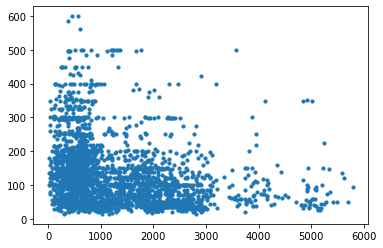

In [422]:
plt.scatter(df_to_path_no['to_path'],df_to_path_no['price'], s= 10)

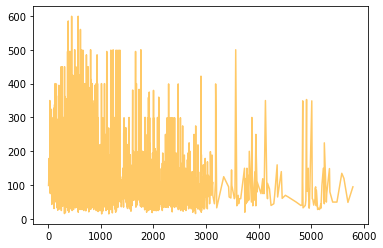

In [425]:
plt.plot(df_to_path_no.groupby('to_path').price.mean().index, 
         df_to_path_no.groupby('to_path').price.mean(),
         color='orange', alpha=0.6)

In [385]:
#test my functions here
stats.ttest_ind(prices,prices_a6)
find_shortest([40.716765, -74.032380])

0.0

In [349]:
#check how many nan values are in a col
def check_na(col_name,df):
    return sum(df[col_name].isna())


#turn dollars(prices) to 
def numericalize(string):
    if type(string) != str:
        pass
    else:
        num = ''
        for char in list(string):
            if char.isnumeric() or char == '.':
                num += char
        return float(num)
    
    
#get aggregated(adj,avg) data
def get_adj_avg(lst,df):
    adj_= []
    avg_= []
    for x in lst:
        adj_.append(df[x])
        avg_.append(df.groupby(x).price.mean())
    return adj_, avg_


def find_shortest(coor):
    lst = [geopy.distance.geodesic(coor, df_patht.loc[x]).m for x in df_patht.index]
    return min(lst)
        